#**Milestone 1:**
Downloading Amazon reviews and creating an own dataset.

### **Setting up the environment**

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# ndjson to read newline delimited json
!pip install ndjson
# updating imbalanced-learn lib on colab
!pip install --upgrade imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.7/dist-packages (0.8.0)


###**Importing the required modules**

In [3]:
# importing relevant libraries
import pandas as pd
import numpy as np
import altair as alt
import ndjson
import seaborn as sns

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

###**Inspecting the dataset**

In [4]:
# importing data from drive
with open('/content/drive/MyDrive/Data/Video_Games_5.json/Video_Games_5.json') as f:
  data = ndjson.load(f)

In [5]:
# creating a dataframe
reviews_df = pd.DataFrame(data)

In [6]:
# checking the size
print('The dataset has {} rows and {} columns'.format(reviews_df.shape[0], reviews_df.shape[1]))

The dataset has 497577 rows and 12 columns


In [7]:
# viewing a sample of the data
reviews_df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


In [8]:
# generating infos about the dataframe
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497577 entries, 0 to 497576
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         497577 non-null  float64
 1   verified        497577 non-null  bool   
 2   reviewTime      497577 non-null  object 
 3   reviewerID      497577 non-null  object 
 4   asin            497577 non-null  object 
 5   reviewerName    497501 non-null  object 
 6   reviewText      497419 non-null  object 
 7   summary         497468 non-null  object 
 8   unixReviewTime  497577 non-null  int64  
 9   vote            107793 non-null  object 
 10  style           289237 non-null  object 
 11  image           3634 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 42.2+ MB


In [9]:
# generating statistics related to numeric columns
reviews_df.describe()

,overall,unixReviewTime
count,497577.000000,4.975770e+05
mean,4.220456,1.367848e+09
std,1.185424,1.224113e+08
min,1.000000,9.398592e+08
25%,4.000000,1.316563e+09
50%,5.000000,1.410221e+09
75%,5.000000,1.452384e+09
max,5.000000,1.538438e+09


In [10]:
# keeping the relevant data
df = reviews_df[['overall', 'reviewText']]

###**Plotting the data**

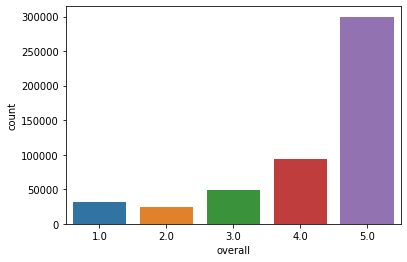

In [11]:
# plotting the data
sns.countplot(data = df, x='overall')

In [12]:
# visualizing the data with altair
rating_counts = Counter(df['overall'])
ratings = [str(i) for i in list(rating_counts.keys())] 
counts = list(rating_counts.values())

# creating a sub-dataframe for altair visualization
chart_data = pd.DataFrame({'rating':ratings, 'count':counts})
chart = alt.Chart(chart_data).mark_bar().encode(x='rating', y='count').interactive()
chart


alt.Chart(...)

###**Creating the datasets**

Generating the small corpus

In [13]:
# preparing the data to be passed for under sampling
X= df['reviewText'].to_numpy().reshape(-1,1)
y= df['overall'].to_numpy().reshape(-1,1)

# initializing random under sampler with predefined sampling strategy, random_state = 42 to get identical results
rus = RandomUnderSampler(
    sampling_strategy={1.0: 1500, 2.0: 500, 3.0: 500, 4.0: 500, 5.0: 1500},
    random_state=42,)

# resampling the data
x_under_s, y_under_s = rus.fit_resample(X, y)

In [14]:
# converting back to DataFrame, adjusting data type
small_corpus = pd.DataFrame({'ratings': y_under_s.flatten(), 'reviews': x_under_s.flatten()})
small_corpus['ratings'] = small_corpus['ratings'].astype('int32')

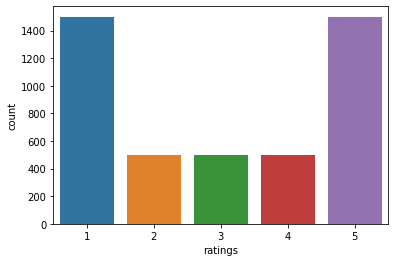

In [15]:
# checking the requirements
sns.countplot(data = small_corpus, x='ratings')

###Generating the big corpus

In [16]:
# to get identical results
np.random.seed(42)

# get 100k on random ratings (1-5) as numpy array
random_ratings = np.random.randint(low=1, high=6, size=100000)

In [17]:
# counting the datapoints for each rating
rating, counts = np.unique(random_ratings, return_counts=True)

# creating a dictionary containing rating and frequency
sampling_strategy = {}
for k, v in zip(rating, counts):
    sampling_strategy[k] = v
print(f'sampling_strategy: {sampling_strategy}')

sampling_strategy: {1: 20018, 2: 20082, 3: 19732, 4: 19981, 5: 20187}


In [18]:
# initializing random under sampler with predefined sampling strategy, random_state = 42 to get identical results
rus = RandomUnderSampler(
    sampling_strategy=sampling_strategy,
    random_state=42,)

# resampling the data
x_under_b, y_under_b = rus.fit_resample(X, y)

In [19]:
# converting back to DataFrame, adjusting data type
big_corpus = pd.DataFrame({'ratings': y_under_b.flatten(), 'reviews': x_under_b.flatten()})
big_corpus['ratings'] = big_corpus['ratings'].astype('int32')

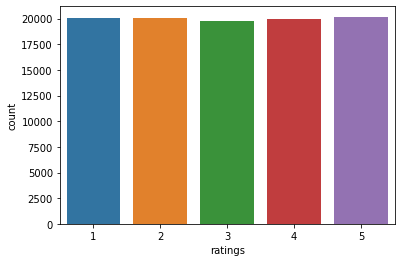

In [20]:
# checking the requirements
sns.countplot(data = big_corpus, x='ratings')

###**Exporting the datasets to csv**

In [21]:
small_corpus.to_csv('/content/drive/MyDrive/Sentiment Analysis for Marketing/Data/small_corpus.csv', index=False)
big_corpus.to_csv('/content/drive/MyDrive/Sentiment Analysis for Marketing/Data/big_corpus.csv', index=False)